RNN은 마지막 셀이 이 값을 디코더에 전달하는데 마지막 셀에 담긴 값에 전체 문장의 뜻이 함축되어 있으므로 이를 문맥 벡터(context vector)라고 한다. 그런데 문장 전체가 길어지면 문맥 벡터가 디코더에 전달하는 것에 문제가 생기는 것으로 RNN의 한계라고 한다.

# 어탠션(attention)
- 먼저 인코더와 디코더 사이에 층이 하나 생긴다. 새로 삽입된 층에는 각 셀로부터 계산된 스코어들이 모인다. 이 스코어를 이용해 소프트맥스 함수를 사용해서 어텐션 가중치를 만든다.
- 이러한 방식으로 매 출력마다 모든 입력값을 두루 활용하는 것이 어텐션.
- 마지막 셀에 모든 입력이 집중되던 RNN의 단점을 극복한 알고리즘

In [1]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing import sequence
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
from attention import Attention

import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 500)         2500000   
                                                                 
 dropout (Dropout)           (None, None, 500)         0         
                                                                 
 lstm (LSTM)                 (None, None, 64)          144640    
                                                                 
 attention (Attention)       (None, 128)               20480     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,665,249
Trainable params: 2,665,249
Non-

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/100
625/625 [==============================] - 521s 828ms/step - loss: 0.3730 - accuracy: 0.8325 - val_loss: 0.2864 - val_accuracy: 0.8821
Epoch 2/100
625/625 [==============================] - 516s 825ms/step - loss: 0.2334 - accuracy: 0.9068 - val_loss: 0.3072 - val_accuracy: 0.8686
Epoch 3/100
625/625 [==============================] - 516s 826ms/step - loss: 0.1705 - accuracy: 0.9332 - val_loss: 0.2965 - val_accuracy: 0.8872
Epoch 4/100
625/625 [==============================] - 517s 827ms/step - loss: 0.1205 - accuracy: 0.9537 - val_loss: 0.3348 - val_accuracy: 0.8856


In [5]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 108s 138ms/step - loss: 0.3348 - accuracy: 0.8856

 Test Accuracy: 0.8856


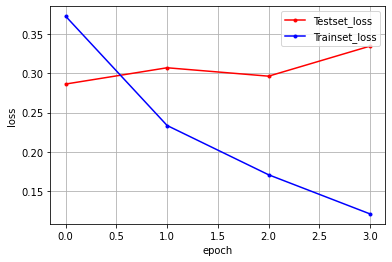

In [6]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()